# Texas Licenses

We originall got our dataset from the [License Files page](https://www.license.state.tx.us/licensesearch/licfile.asp) from the Texas Department of Licensing and Regulation, but they've changed around since then! I'm pretty sure it's [this dataset](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but we'll just use a local version instead of the most current.

# PART ONE: OPENING UP OUR DATASET

## 0. Do your setup

Import what you need to import, etc.

In [1]:
import pandas as pd

%matplotlib inline

## 1. Open the file

We'll start with `licfile.csv`, which is a list of licenses.

In [2]:
df = pd.read_csv("licfile.csv")
df.head()

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,08102017,"RISINGER, JIM MARVIN.1",7668 S US HWY 59,Unnamed: 11,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,Unnamed: 17,N
0,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
1,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
2,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
3,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N
4,Associate Auctioneer,15650,OUT OF STATE,"THOMPSON, RANDY D",NaN,NaN,NaN,NaN,5042017,"THOMPSON, RANDY D",10995 BELLEVILLE RD,NaN,RINGLING OK 73456,999.0,OUT OF STATE,73456,5802765961,NaN,N


## 2. That looks terrible, let's add column names.

It apparently doesn't have headers! **Read the file in again, but setting your own column names**. Their [current data dictionary might not perfectly match](https://www.opendatanetwork.com/dataset/data.texas.gov/7358-krk7), but you can use it to understand what the columns are. For the dataset we're using, the order goes like this:

* LICTYPE
* LICNUMBER
* BIZCOUNTY
* BIZNAME
* BIZLINE1
* BIZLINE2
* BIZCITYSTATE
* BIZTELEPHONE
* EXPIRATION
* OWNER
* MAILLINE1
* MAILLINE2
* MAILCITYSTATE
* MAILCOUNTYCODE
* MAILCOUNTY
* MAILZIP
* TELEPHONE
* LICSUBTYPE
* CEFLAG

**Note:** You can rename the columns to things that make sense - "expiration" is a little more manageable than "LICENSE EXPIRATION DATE (MMDDCCYY)". I've named my License Type column LICTYPE, so if you haven't you'll have to change the rest of my sample code to match.

In [3]:
df = pd.read_csv("licfile.csv", names=['LICTYPE', 'LICNUMBER', 'BIZCOUNTY', 'BIZNAME', 'BIZLINE1', 'BIZLINE2', \
                                       'BIZCITYSTATE', 'BIZTELEPHONE', 'EXPIRATION', 'OWNER', 'MAILLINE1', \
                                       'MAILLINE2', 'MAILCITYSTATE', 'MAILCOUNTYCODE', 'MAILCOUNTY', 'MAILZIP', \
                                       'TELEPHONE', 'LICSUBTYPE', 'CEFLAG'])
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,8102017,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,347.0,NACOGDOCHES,75964,9363665745,NaN,N
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,12292017,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,183.0,GREGG,75662,9039187899,NaN,N
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,9262017,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,493.0,WILSON,78147,NaN,NaN,N
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,11042017,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,201.0,HARRIS,77076,7136445566,NaN,N
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2252018,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,27.0,BELL,76511,2549852228,NaN,N


# 3. Force string columns to be strings

The county code and expiration dates are being read in as numbers, which is going to cause some trouble later on. You can force a column to be a certain type (most usually strings) when reading it in with the following code:

    df = pd.read_csv("your-filename.csv", dtype={"colname1": str, "colname2": str})

You don't need to do it for every column, just the ones you want to force!

**Re-import the file, forcing the expiration date, license number, mailing address county code, mailing zip code and telephone to all be strings.**

In [4]:
df = pd.read_csv("licfile.csv", names=['LICTYPE', 'LICNUMBER', 'BIZCOUNTY', 'BIZNAME', 'BIZLINE1', 'BIZLINE2', \
                                       'BIZCITYSTATE', 'BIZTELEPHONE', 'EXPIRATION', 'OWNER', 'MAILLINE1', \
                                       'MAILLINE2', 'MAILCITYSTATE', 'MAILCOUNTYCODE', 'MAILCOUNTY', 'MAILZIP', \
                                       'TELEPHONE', 'LICSUBTYPE', 'CEFLAG'], dtype={"EXPIRATION": str, \
                                       "LICNUMBER": str, "MAILCOUNTYCODE": str, "MAILZIP": str, "TELEPHONE": str})

Check the data types of your columns to be sure! If you do it right they'll be `object` (not `str`, oddly).

In [5]:
df.dtypes

LICTYPE            object
LICNUMBER          object
BIZCOUNTY          object
BIZNAME            object
BIZLINE1          float64
BIZLINE2          float64
BIZCITYSTATE      float64
BIZTELEPHONE      float64
EXPIRATION         object
OWNER              object
MAILLINE1          object
MAILLINE2          object
MAILCITYSTATE      object
MAILCOUNTYCODE     object
MAILCOUNTY         object
MAILZIP            object
TELEPHONE          object
LICSUBTYPE         object
CEFLAG             object
dtype: object

## 4. Convert those expiration dates from MMDDYYYY to YYYY-MM-DD

List slicing forever! It's the thing with the `[]`. There are like five ways to do this one.

In [6]:
df['EXPIRATION'] = df.EXPIRATION.str[-4:] + '-' + df.EXPIRATION.str[:2] + '-' + df.EXPIRATION.str[2:4]

Check the first five expirations to make sure they look right.

In [7]:
df['EXPIRATION'].head()

0    2017-08-10
1    2017-12-29
2    2017-09-26
3    2017-11-04
4    2018-02-25
Name: EXPIRATION, dtype: object

# PART TWO: LOOKING AT LICENSES

## 5. What are the top 10 most common licenses?

In [8]:
df.LICTYPE.value_counts().head(10)

Cosmetology Operator        151206
Apprentice Electrician      110593
Cosmetology Manicurist       49563
Journeyman Electrician       38170
A/C Technician               27959
Cosmetology Esthetician      23613
Cosmetology Beauty Salon     23577
Master Electrician           16810
A/C Contractor               16376
Barber, Class A              16019
Name: LICTYPE, dtype: int64

## 6. What are the top 10 least common?

In [9]:
df.LICTYPE.value_counts().tail(10)

Registered Accessibility Specialist CE Provider    8
Mobile Cosmetology Esthetician Specialty Saloon    5
Barber Hair Braiding Shop                          4
Barber Hair Weaving Shop                           4
Booting CE Provider                                3
Cosmetology Wig Instructor                         2
Mobile Cosmetology Esthetician/Manicure Saloon     2
Mobile Cosmetology Manicure Specialty Saloon       2
Licensed Court Interpreter CE Provider             2
Legal Service Contract Admin                       1
Name: LICTYPE, dtype: int64

## 7. Try to select everyone who is any type of electrician.

You're going to get an error about `"cannot index with vector containing NA / NaN values"`. Let's work our way in there.

In [10]:
# Yes I know I left this in here, it's a learning experience!
df[df['LICTYPE'].str.contains("Electrician")]

ValueError: cannot index with vector containing NA / NaN values

## 8. How many of the rows of LICTYPE are NaN?

In [11]:
df.LICTYPE.isna().sum()

7086

Over 7000 licenses don't have types! As a result, when we look for license types with electricians - aka do `df['LICTYPE'].str.contains("Electrician")` - we get three results:

* `True` means `LICTYPE` exists and contains `"Electrician"`
* `False` means `LICTYPE` exists and does not contain `"Electrician"`
* `NaN` means `LICTYPE` does not exist for that row

## 9. Actually getting everyone who is an electrician

This doesn't work when trying to select electricians, though, as NaN is a no-go for a filter. We *could* filter out everywhere the LICTYPE is null, but we could also cheat a little and say "replace all of the `NaN` values with `False` values."

`.fillna(False)` will take every `NaN` and replace it with `False`. 

In [12]:
df = df.dropna(subset=['LICTYPE'])

In [13]:
electrician = df[df['LICTYPE'].str.contains("Electrician")]
electrician

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG
47025,Apprentice Electrician,30244,ROBERTSON,"BOLTON, MARION N",NaN,NaN,NaN,NaN,2017-05-27,"BOLTON, MARION N",2262 HARBOR BOLTON RD,NaN,FRANKLIN TX 77856-5367,0395,ROBERTSON,77856,9798284713,AE,N
47026,Apprentice Electrician,30798,BEXAR,"GONZALEZ, FELIX G JR",NaN,NaN,NaN,NaN,2017-10-21,"GONZALEZ, FELIX G JR",8507 TIMBER BELT,NaN,SAN ANTONIO TX 78250-4478,0029,BEXAR,78250,2104887491,AE,N
47027,Apprentice Electrician,30802,HARRIS,"HERNANDEZ, RUFINO",NaN,NaN,NaN,NaN,2017-05-28,"HERNANDEZ, RUFINO",1719 ROBINHOOD ST,NaN,PASADENA TX 77502-2218,0201,HARRIS,77502,7133824802,AE,N
47028,Apprentice Electrician,31875,TITUS,"COPELAND, MARCUS A",NaN,NaN,NaN,NaN,2016-06-18,"COPELAND, MARCUS A",201 N MADISON AVE,NaN,MOUNT PLEASANT TX 75455-3944,0449,TITUS,75455,9035634950,AE,N
47029,Apprentice Electrician,31876,TITUS,"ANGLIN, DAVID LEE",NaN,NaN,NaN,NaN,2016-10-26,"ANGLIN, DAVID LEE",8066 FM 1001,NaN,COOKVILLE TX 75558-3064,0449,TITUS,75558,9039462547,AE,N
47030,Apprentice Electrician,32428,HARRIS,"VALLEJO, ARMANDO E",NaN,NaN,NaN,NaN,2016-10-21,"VALLEJO, ARMANDO E",3903 ERBY ST TRLR 88,NaN,HOUSTON TX 77087-1250,0201,HARRIS,77087,8325285241,AE,N
47031,Apprentice Electrician,32440,TRAVIS,"RODRIGUEZ, REYNALDO",NaN,NaN,NaN,NaN,2017-12-14,"RODRIGUEZ, REYNALDO",10905 SHAWN LEE CV,NaN,AUSTIN TX 78753-3363,0453,TRAVIS,78753,7372474738,AE,N
47032,Apprentice Electrician,32442,CASS,"TERRY, ALAN D JR",NaN,NaN,NaN,NaN,2017-06-03,"TERRY, ALAN D JR",605 KEASLER,NaN,HUGHES SPRINGS TX 75656-2575,0067,CASS,75656,9036392017,AE,N
47033,Apprentice Electrician,32450,HARRIS,"TREVINO, ADIEL A",NaN,NaN,NaN,NaN,2017-06-11,"TREVINO, ADIEL A",3824 LYDIA ST,NaN,HOUSTON TX 77021-6125,0201,HARRIS,77021,7134406945,AE,N
47034,Apprentice Electrician,32453,GALVESTON,"ROACHELL, LAWRENCE S",NaN,NaN,NaN,NaN,2017-11-17,"ROACHELL, LAWRENCE S",115 LAUREL MEADOW CT,NaN,LA MARQUE TX 77568-2497,0167,GALVESTON,77568,4095390843,AE,N


## 10. What's the most popular kind of electrician?

In [14]:
electrician.LICTYPE.value_counts().head(1)

Apprentice Electrician    110593
Name: LICTYPE, dtype: int64

## 11. Graph it, with the largest bar on top.

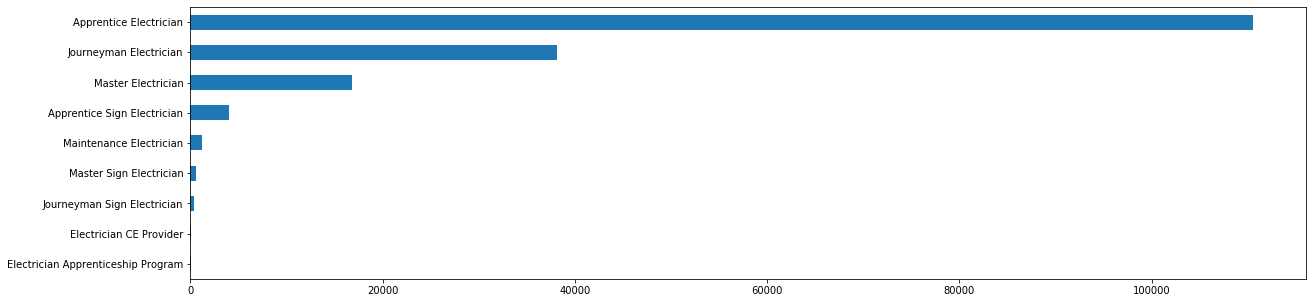

In [15]:
electrician.LICTYPE.value_counts().sort_values().plot(kind='barh', figsize=(20, 5))

## 12. How many sign electricians are there?

There are a few ways to do this one.

In [16]:
signe = electrician[electrician['LICTYPE'].str.contains("Sign Electrician")]
signe.LICTYPE.count()

4927

# PART THREE: LOOKING AT LAST NAMES

## 13. Extract every owner's last name

You want everything before the comma. We've done this before (in a few different ways!).

* **Hint:** If you get an error about missing or `NaN` data, you might use `.fillna('')` to replace every empty owner name with an empty string. This might not happen to you, though, depending on how you do it!

* **Hint:** You probably want to do `expand=False` on your extraction to make sure it comes out as a series instead of a dataframe.

In [17]:
df.BIZNAME.str.extract("(.*),", expand=False)

0            RISINGER
1            WILLIAMS
2             GUEVARA
3              BOWERS
4              DEMSKY
5            THOMPSON
6              TUCKER
7              COOPER
8         BLANKENSHIP
9               DAWES
10             LESTER
11            MANCILL
12         HUDDLESTON
13             JORDAN
14              IRWIN
15               HALL
16              JAMES
17             SIDAWI
18              SMITH
19           FERGUSON
20           MCKINLEY
21             SOWELL
22             SEVIER
23         SOMERVILLE
24           BARCLIFT
25               FORD
26            SCHAFER
27           MARTINEZ
28            CLEMANS
29           MARTINEZ
             ...     
597786        SNUFFER
597787       MARTINEZ
597788         YOSTEN
597789          CLICK
597790          PENSE
597791           LARA
597792          SMITH
597793      BINNICKER
597794         CHAVEZ
597795       GUERRERO
597796         SAVAGE
597797          ADAMS
597798          SCOTT
597799           HILL
597800    

## 14. Save the last name into a new column

Then check to make sure it exists, and you successfully saved it into the dataframe.

In [18]:
df['LASTNAME'] = df.BIZNAME.str.extract("(.*),", expand=False)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,MAILLINE1,MAILLINE2,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME
0,Associate Auctioneer,7326,ANGELINA,"RISINGER, JIM MARVIN",NaN,NaN,NaN,NaN,2017-08-10,"RISINGER, JIM MARVIN",7668 S US HWY 59,NaN,NACOGDOCHES TX 75964,0347,NACOGDOCHES,75964,9363665745,NaN,N,RISINGER
1,Associate Auctioneer,7962,UPSHUR,"WILLIAMS, JON ANDRE",NaN,NaN,NaN,NaN,2017-12-29,"WILLIAMS, JON ANDRE",228 FM 1252,NaN,KILGORE TX 75662,0183,GREGG,75662,9039187899,NaN,N,WILLIAMS
2,Associate Auctioneer,8406,WILSON,"GUEVARA, JUAN ANTONIO",NaN,NaN,NaN,NaN,2017-09-26,"GUEVARA, JUAN ANTONIO",6909 HWY 181,NaN,POTH TX 78147,0493,WILSON,78147,NaN,NaN,N,GUEVARA
3,Associate Auctioneer,10543,HARRIS,"BOWERS, JAMES BRISCOE II",NaN,NaN,NaN,NaN,2017-11-04,"BOWERS, JAMES BRISCOE II",6767 NORTH FWY,NaN,HOUSTON TX 77076-2027,0201,HARRIS,77076,7136445566,NaN,N,BOWERS
4,Associate Auctioneer,10642,BELL,"DEMSKY, JOHN EDWARD",NaN,NaN,NaN,NaN,2018-02-25,"DEMSKY, JOHN EDWARD",130 E CLARK ST,NaN,BARTLETT TX 76511,0027,BELL,76511,2549852228,NaN,N,DEMSKY


# 15. What are the ten most popular last names?

In [20]:
df.LASTNAME.value_counts().head(10)

NGUYEN       22331
TRAN          8159
GARCIA        5619
LE            5608
MARTINEZ      4724
RODRIGUEZ     4636
HERNANDEZ     4415
PHAM          4000
GONZALEZ      3639
SMITH         3312
Name: LASTNAME, dtype: int64

## 16. What are the most popular licenses for people with the last name Nguyen? Tran? Le?

Those are the top 3 last names in Vietnam.

In [21]:
df[df.LASTNAME == 'NGUYEN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     12855
Cosmetology Operator        4039
Cosmetology Esthetician     2881
Cosmetologist               1874
Apprentice Electrician       195
Name: LICTYPE, dtype: int64

In [22]:
df[df.LASTNAME == 'TRAN'].LICTYPE.value_counts().head()

Cosmetology Manicurist     4674
Cosmetology Operator       1474
Cosmetology Esthetician    1032
Cosmetologist               712
Apprentice Electrician       95
Name: LICTYPE, dtype: int64

In [23]:
df[df.LASTNAME == 'LE'].LICTYPE.value_counts().head()

Cosmetology Manicurist     3276
Cosmetology Operator        953
Cosmetology Esthetician     730
Cosmetologist               497
A/C Technician               43
Name: LICTYPE, dtype: int64

## 17. Now do all of that in one line - most popular licenses for Nguyen, Tran and Le - without using `&`

In [24]:
df[df.LASTNAME.isin(["NGUYEN", "TRAN", "LE"])].LICTYPE.value_counts().head()

Cosmetology Manicurist     20805
Cosmetology Operator        6466
Cosmetology Esthetician     4643
Cosmetologist               3083
Apprentice Electrician       327
Name: LICTYPE, dtype: int64

## 18. Most popular licenses for Garcia? Rodriguez? Martinez?

Those are the 3 most common last names for self-identifying Hispanics in the USA.

In [25]:
df[df.LASTNAME == 'GARCIA'].LICTYPE.value_counts().head()

Apprentice Electrician    1952
Cosmetology Operator      1672
Journeyman Electrician     493
A/C Technician             333
Barber, Class A            186
Name: LICTYPE, dtype: int64

In [26]:
df[df.LASTNAME == 'RODRIGUEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1573
Cosmetology Operator      1390
Journeyman Electrician     386
A/C Technician             320
Barber, Class A            138
Name: LICTYPE, dtype: int64

In [27]:
df[df.LASTNAME == 'MARTINEZ'].LICTYPE.value_counts().head()

Apprentice Electrician    1618
Cosmetology Operator      1388
Journeyman Electrician     387
A/C Technician             317
Barber, Class A            149
Name: LICTYPE, dtype: int64

## 19. Most popular license for anyone with a last name that ENDS in `-ez`

The answer is not `.str.contains('ez')`, but it isn't necessarily too different. **Make sure your numbers match mine.**

One way involves a `.str.` method that check if a string ends with something, the other way involves a regular expression that has a "end of the string" marker (similar to how we've used `^` for the start of a string before). If you're thinking about the latter, I might take a look at [this page](http://www.rexegg.com/regex-quickstart.html) under "Anchors and Boundaries". 

In [28]:
df[df.LASTNAME.str.contains("EZ$", na=False)].LICTYPE.value_counts().head(1)

Apprentice Electrician    16065
Name: LICTYPE, dtype: int64

## 20. Get that as a percentage

In [29]:
df[df.LASTNAME.str.contains("EZ$", na=False)].LICTYPE.value_counts(normalize=True).head(1)

Apprentice Electrician    0.354957
Name: LICTYPE, dtype: float64

# PART FOUR: LOOKING AT FIRST NAMES

## 21. Extract the owner's first name

First, a little example of how regular expressions work with pandas.

In [30]:
# Build a dataframe
sample_df = pd.DataFrame([
    { 'name': 'Mary', 'sentence': "I am 90 years old" },
    { 'name': 'Jack', 'sentence': "I am 4 years old" },
    { 'name': 'Anne', 'sentence': "I am 27 years old" },
    { 'name': 'Joel', 'sentence': "I am 13 years old" },
])
# Look at the dataframe
sample_df

,name,sentence
0,Mary,I am 90 years old
1,Jack,I am 4 years old
2,Anne,I am 27 years old
3,Joel,I am 13 years old


In [31]:
# Given the sentence, "I am X years old", extract digits from the middle using ()
# Anything you put in () will be saved as an output.
# If you do expand=True it makes you a dataframe, but we don't want that.
sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)

0    90
1     4
2    27
3    13
Name: sentence, dtype: object

In [32]:
# Save it into a new column
sample_df['age'] = sample_df['sentence'].str.extract("I am (\d+) years old", expand=False)
sample_df.head()

,name,sentence,age
0,Mary,I am 90 years old,90
1,Jack,I am 4 years old,4
2,Anne,I am 27 years old,27
3,Joel,I am 13 years old,13


**Now let's think about how we're going to extract the first names.** Begin by looking at a few full names.

In [33]:
df['OWNER'].head(10)

0        RISINGER, JIM MARVIN
1         WILLIAMS, JON ANDRE
2       GUEVARA, JUAN ANTONIO
3    BOWERS, JAMES BRISCOE II
4         DEMSKY, JOHN EDWARD
5           THOMPSON, RANDY D
6          TUCKER, MONTE EARL
7        COOPER, THOMAS JAMES
8     BLANKENSHIP, KERRY NEIL
9      DAWES, NICHOLAS MORGAN
Name: OWNER, dtype: object

What can you use to find the first name? It helps to say "this is to the left and this is to the right, and I'm going to take anything in the middle."

Once you figure out how to extract it, you can do a `.head(10)` to just look at the first few.

In [34]:
df['BIZNAME'].str.extract("\D+, (\w+)\s\D+\s*", expand=False).head(10)

0         JIM
1         JON
2        JUAN
3       JAMES
4        JOHN
5       RANDY
6       MONTE
7      THOMAS
8       KERRY
9    NICHOLAS
Name: BIZNAME, dtype: object

## 22. Saving the owner's first name

Save the name to a new column, `FIRSTNAME`.

In [35]:
df['FIRSTNAME'] = df['BIZNAME'].str.extract("\D+, (\w+)\s\D+\s*", expand=False)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# 23. Examine everyone without a first name

I purposefully didn't do a nicer regex in order to have some screwed-up results. **How many people are there without an entry in the first name column?**

Your numbers might be different than mine.

In [37]:
df.FIRSTNAME.isna().sum()

199148

What do their names look like?

In [38]:
df[df.FIRSTNAME.isna()].BIZNAME

29           MARTINEZ, ARTURO
63         VANGINAULT, FREDDY
64         VANSICKLE, MICHAEL
73             COFFMAN, ERICK
76              HUNTER, SCOTT
77              WATTS, EDWARD
87             SERRATO, ZENON
92              ASHLEY, WAYNE
96          MARSLAND, RICHARD
109           RICHARD, MEDINA
119              LUCIO, JAIME
120         ESCAMILLA, ROBERT
136            ARCIGA, HECTOR
139         ROBINSON, RICHARD
140                BELL, JANA
141               BETHKE, MAX
150             SIBLEY, SHAWN
151            REYES, OCTAVIO
158        BAKER, CHRISTOPHER
159               CLARK, JOSH
161            NIETO, ARNULFO
163            EDWARDS, BRIAN
166            FLORES, ISIDRO
169          HALKARD, KENNETH
175       ESPINOSA, NATIVIDAD
177           PADILLA, ERASTO
182                ADAM, ARCE
185       HERNANDEZ, JONATHAN
188           SEELING, NORMAN
191            STEVENS, CHUCK
                 ...         
597409          TORREZ, SELSO
597417          LOEWEN, JOHNY
597421    

## 24. If it's a problem, you can fix it (if you'd like!)

Maybe you have another regular expression that works better with JUST these people? It really depends on how you've put together your previous regex!

If you'd like to use a separate regex for this group, you can use code like this:

`df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = .....`

That will only set the `FIRSTNAME` for people where `FIRSTNAME` is null.

In [39]:
df.loc[df.FIRSTNAME.isnull(), 'FIRSTNAME'] = df['BIZNAME'].str.extract("\D+, (\w+)", expand=False)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


How many empty first names do we have now?

In [40]:
df.FIRSTNAME.isna().sum()

66012

My code before only worked for people with middle names, but now it got people without middle names, too. Looking much better!

## 25. Most popular first names?

In [41]:
df.FIRSTNAME.value_counts().head(10)

JOSE           7891
MICHAEL        6264
DAVID          5740
JAMES          5380
MARIA          5245
ROBERT         4740
JOHN           4690
JUAN           4613
CHRISTOPHER    3213
WILLIAM        3149
Name: FIRSTNAME, dtype: int64

## 26. Most popular first names for a Cosmetology Operator, Cosmetology Esthetician, Cosmetologist, and okay honestly anything that seems similar?

If you get an error about "cannot index vector containing NA / NaN values" remember `.fillna(False)` - if a row doesn't have a license, it doesn't give a `True`/`False`, so we force all of the empty rows to be `False`.

In [42]:
df[df.LICTYPE.str.contains("Cosmetolog")].FIRSTNAME.value_counts().head()

MARIA       4768
THUY        2152
PHUONG      2022
JENNIFER    1899
KIM         1830
Name: FIRSTNAME, dtype: int64

## 27. Most popular first names for anything involving electricity?

In [43]:
df[df.LICTYPE.str.contains("Electric")].FIRSTNAME.value_counts().head()

JOSE       5719
MICHAEL    3547
JUAN       3334
DAVID      3314
JAMES      2971
Name: FIRSTNAME, dtype: int64

## 28. Can we be any more obnoxious in this assignment?

Not only are we going to detect gender from first names, but we're also going to use a library that has the terrible name of [sex machine](https://github.com/ferhatelmas/sexmachine/). Once upon a time there was Ruby package named sex machine and everyone was like "come on are you six years old? is this how we do things?" and the guy was like "you're completely right I'm renaming it to [gender detector](https://github.com/bmuller/gender_detector)" and the world was Nice and Good again. Apparently Python didn't get the message.

Except actually sexmachine doesn't work on Python 3 because it's from 300 BC so we're going to use a Python 3 fork called [gender guesser](https://pypi.python.org/pypi/gender-guesser/) (hooray!).

#### Use `pip` or `pip3` to install gender-guesser.

In [44]:
!pip install gender-guesser

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### Test to see that it works

In [45]:
import gender_guesser.detector as gender

detector = gender.Detector(case_sensitive=False)
detector.get_gender('David')

'male'

In [46]:
detector.get_gender('Jose')

'male'

In [47]:
detector.get_gender('Maria')

'female'

#### Use it on a dataframe

To use something fancy like that on a dataframe, you use `.apply`. Check it out: 

In [48]:
df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name)).head()

0    male
1    male
2    male
3    male
4    male
Name: FIRSTNAME, dtype: object

## 29. Calculate the gender of everyone's first name and save it to a column

Confirm by see how many people of each gender we have

In [49]:
df['GENDER'] = df['FIRSTNAME'].fillna('').apply(lambda name: detector.get_gender(name))

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df.GENDER.value_counts()

male             238653
female           147025
unknown          114270
mostly_female     42389
mostly_male       27271
andy              21122
Name: GENDER, dtype: int64

## 30. We like taking risks - get rid of ambiguity

* Combine the `mostly_female` into `female` 
* Combine the `mostly_male` into `male`
* Replace `andy` (androgynous) and `unknown` with `NaN`

you can get NaN not by making a string, but with `import numpy as np` and then using `np.nan`.

In [51]:
import numpy as np

df['GENDER'] = df.GENDER.replace({
    'mostly_female': 'female',
    'mostly_male': 'male'
})

df['GENDER'] = df.GENDER.replace(["andy"], np.nan)

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## 31. Do men or women have more licenses? What is the percentage of unknown genders?

In [52]:
# number
df.GENDER.value_counts()

male       265924
female     189414
unknown    114270
Name: GENDER, dtype: int64

In [53]:
# percentage
df.GENDER.value_counts(normalize=True) * 100

male       46.685440
female     33.253395
unknown    20.061165
Name: GENDER, dtype: float64

## 32. What are the popular unknown- or ambiguous gender first names?

Yours might be different! Mine is a combination of actual ambiguity, cultural bias and dirty data.

In [54]:
df[df['GENDER'] == 'unknown'].FIRSTNAME.value_counts().head()

INC       845
LLC       556
LA        253
VY        245
NGUYEN    235
Name: FIRSTNAME, dtype: int64

## 31. What are the most popular licenses for men? For women?

In [55]:
# men
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95674
Journeyman Electrician    35508
A/C Technician            24714
Master Electrician        15769
A/C Contractor            15121
Name: LICTYPE, dtype: int64

In [56]:
# women
df[df['GENDER'] == 'female'].LICTYPE.value_counts().head()

Cosmetology Operator       114831
Cosmetology Manicurist      24754
Cosmetology Esthetician     17125
Apprentice Electrician       4791
Cosmetologist                4602
Name: LICTYPE, dtype: int64

## 32. What is the gender breakdown for Property Tax Appraiser? How about anything involving Tow Trucks?

If you're in need, remember your good friend `.fillna(False)` to get rid of NaN values.

In [57]:
df[df.LICTYPE == 'Property Tax Appraiser'].GENDER.value_counts()

male       1457
female     1178
unknown     176
Name: GENDER, dtype: int64

In [58]:
df[df.LICTYPE.str.contains("Tow Truck")].GENDER.value_counts()

male       12979
unknown     1196
female       641
Name: GENDER, dtype: int64

(By the way, what are those tow truck jobs?)

In [59]:
df[df.LICTYPE.str.contains("Tow Truck")].LICTYPE.value_counts()

Tow Truck Operator (Incident Management)    7804
Tow Truck Operator (Consent Tow)            6703
Tow Truck Operator (Private Property)        352
Tow Truck Operator Trainee                    53
Name: LICTYPE, dtype: int64

## 33. Graph them!

And let's **give them titles** so we know which is which.

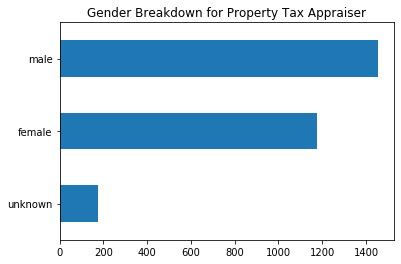

In [60]:
df[df.LICTYPE == 'Property Tax Appraiser'].GENDER.value_counts().sort_values().\
plot(kind='barh', title="Gender Breakdown for Property Tax Appraiser")

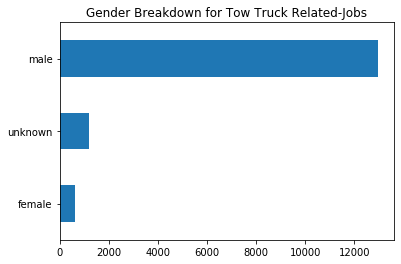

In [61]:
df[df.LICTYPE.str.contains("Tow Truck")].GENDER.value_counts().sort_values().\
plot(kind='barh', title="Gender Breakdown for Tow Truck Related-Jobs")

## 34. Calcuate the gender bias for profession

I spent like an hour on this and then realized a super easy way to do it. Welcome to programming! I'll do this part for you.

In [62]:
# So when you do .value_counts(), it gives you an index and a value
df[df['GENDER'] == 'male'].LICTYPE.value_counts().head()

Apprentice Electrician    95674
Journeyman Electrician    35508
A/C Technician            24714
Master Electrician        15769
A/C Contractor            15121
Name: LICTYPE, dtype: int64

We did `pd.concat` to combine dataframes, but you can also use it to combine series (like the results of `value_counts()`). If you give it a few `value_counts()` and give it some column names it'll make something real nice.

In [63]:
# All of the values_counts() we will be combining
vc_series = [
    df[df['GENDER'] == 'male'].LICTYPE.value_counts(),
    df[df['GENDER'] == 'female'].LICTYPE.value_counts(),
    df[df['GENDER'].isnull()].LICTYPE.value_counts()
]
# You need axis=1 so it combines them as columns
gender_df = pd.concat(vc_series, axis=1)
gender_df.head()

/Users/grace/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,LICTYPE,LICTYPE,LICTYPE
A/C Contractor,15121.0,422.0,166.0
A/C Technician,24714.0,880.0,339.0
Appliance Installer,1819.0,66.0,11.0
Apprentice Electrician,95674.0,4791.0,794.0
Apprentice Sign Electrician,3368.0,175.0,50.0


In [64]:
# Turn "A/C Contractor" etc into an actual column instead of an index
gender_df.reset_index(inplace=True)
gender_df.head()

,index,LICTYPE,LICTYPE,LICTYPE
0,A/C Contractor,15121.0,422.0,166.0
1,A/C Technician,24714.0,880.0,339.0
2,Appliance Installer,1819.0,66.0,11.0
3,Apprentice Electrician,95674.0,4791.0,794.0
4,Apprentice Sign Electrician,3368.0,175.0,50.0


In [65]:
# Rename the columns appropriately
gender_df.columns = ["license", "male", "female", "unknown"]
# Clean up the NaN by replacing them with zeroes
gender_df.fillna(0, inplace=True)
gender_df.head()

,license,male,female,unknown
0,A/C Contractor,15121.0,422.0,166.0
1,A/C Technician,24714.0,880.0,339.0
2,Appliance Installer,1819.0,66.0,11.0
3,Apprentice Electrician,95674.0,4791.0,794.0
4,Apprentice Sign Electrician,3368.0,175.0,50.0


## 35. Add new columns for total licenses, percent known (not percent unknown!), percent male (of known), percent female (of known)

And replace any `NaN`s with `0`.

In [67]:
gender_df['total_licenses'] = gender_df.male + gender_df.female + gender_df.unknown
gender_df['percent_known'] = (gender_df.male + gender_df.female) / gender_df.total_licenses * 100
gender_df['percent_male_of_known'] = gender_df.male / gender_df.total_licenses * 100
gender_df['percent_female_of_known'] = gender_df.female / gender_df.total_licenses * 100

gender_df.head()

,license,male,female,unknown,total_licenses,percent_known,percent_male_of_known,percent_female_of_known
0,A/C Contractor,15121.0,422.0,166.0,15709.0,98.943281,96.256923,2.686358
1,A/C Technician,24714.0,880.0,339.0,25933.0,98.692785,95.299425,3.393360
2,Appliance Installer,1819.0,66.0,11.0,1896.0,99.419831,95.938819,3.481013
3,Apprentice Electrician,95674.0,4791.0,794.0,101259.0,99.215872,94.484441,4.731431
4,Apprentice Sign Electrician,3368.0,175.0,50.0,3593.0,98.608405,93.737824,4.870582


## 35. What 10 licenses with more than 2,000 people and over 75% known has the most male owners? The most female?

In [68]:
# most male owners
gender_df[(gender_df.total_licenses > 2000) & (gender_df.percent_known > 75)].\
sort_values(by = 'male', ascending=False).head(10)

,license,male,female,unknown,total_licenses,percent_known,percent_male_of_known,percent_female_of_known
3,Apprentice Electrician,95674.0,4791.0,794.0,101259.0,99.215872,94.484441,4.731431
35,Journeyman Electrician,35508.0,1025.0,239.0,36772.0,99.350049,96.562602,2.787447
1,A/C Technician,24714.0,880.0,339.0,25933.0,98.692785,95.299425,3.393360
40,Master Electrician,15769.0,393.0,120.0,16282.0,99.262990,96.849281,2.413708
0,A/C Contractor,15121.0,422.0,166.0,15709.0,98.943281,96.256923,2.686358
25,Cosmetology Operator,13580.0,114831.0,4636.0,133047.0,96.515517,10.206919,86.308598
23,Cosmetology Manicurist,10697.0,24754.0,10154.0,45605.0,77.734897,23.455761,54.279136
13,"Barber, Class A",9773.0,4098.0,288.0,14159.0,97.965958,69.023236,28.942722
54,Tow Truck Operator (Incident Management),6850.0,344.0,42.0,7236.0,99.419569,94.665561,4.754008
53,Tow Truck Operator (Consent Tow),5779.0,276.0,50.0,6105.0,99.180999,94.660115,4.520885


In [69]:
# most female owners
gender_df[(gender_df.total_licenses > 2000) & (gender_df.percent_known > 75)].\
sort_values(by = 'female', ascending=False).head(10)

,license,male,female,unknown,total_licenses,percent_known,percent_male_of_known,percent_female_of_known
25,Cosmetology Operator,13580.0,114831.0,4636.0,133047.0,96.515517,10.206919,86.308598
23,Cosmetology Manicurist,10697.0,24754.0,10154.0,45605.0,77.734897,23.455761,54.279136
19,Cosmetology Esthetician,1595.0,17125.0,2390.0,21110.0,88.678351,7.555661,81.122691
3,Apprentice Electrician,95674.0,4791.0,794.0,101259.0,99.215872,94.484441,4.731431
16,Cosmetologist,648.0,4602.0,1430.0,6680.0,78.592814,9.700599,68.892216
37,Legal Service Contract Sales Rep,5663.0,4438.0,74.0,10175.0,99.272727,55.656020,43.616708
26,Cosmetology Operator Instructor,553.0,4403.0,79.0,5035.0,98.430983,10.983118,87.447865
13,"Barber, Class A",9773.0,4098.0,288.0,14159.0,97.965958,69.023236,28.942722
58,VSF Employee,1434.0,1761.0,28.0,3223.0,99.131244,44.492709,54.638536
44,Property Tax Appraiser,1457.0,1178.0,35.0,2670.0,98.689139,54.569288,44.119850


## 36. Let's say you have to call a few people about being in a profession dominated by the other gender. What are their phone numbers?

This will involve doing some research in one dataframe, then the other one. I didn't put an answer here because I'm interested in what you come up with!

In [70]:
gender_df[(gender_df.total_licenses > 2000) & (gender_df.percent_male_of_known < 10)]

,license,male,female,unknown,total_licenses,percent_known,percent_male_of_known,percent_female_of_known
16,Cosmetologist,648.0,4602.0,1430.0,6680.0,78.592814,9.700599,68.892216
19,Cosmetology Esthetician,1595.0,17125.0,2390.0,21110.0,88.678351,7.555661,81.122691


In [71]:
# For men who are in a profession dominated by women, can call these people
df[(df.LICTYPE.isin(['Cosmetologist', 'Cosmetology Esthetician'])) & (df.GENDER == 'male')] 

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME,GENDER
204135,Cosmetology Esthetician,853332,BEXAR,"BERLIN, DEREK",NaN,NaN,NaN,NaN,2017-12-31,"BERLIN, DEREK",...,SAN ANTONIO TX 78247-3023,0029,BEXAR,78247,2104955958,FA,N,BERLIN,DEREK,male
206960,Cosmetology Esthetician,881017,LUBBOCK,"ZERRATA, ISIDRO JR",NaN,NaN,NaN,NaN,2018-05-31,"ZERRATA, ISIDRO JR",...,LUBBOCK TX 79403-1820,0303,LUBBOCK,79403,8067863071,FA,N,ZERRATA,ISIDRO,male
207019,Cosmetology Esthetician,881757,DALLAS,"POOLE, MICHAEL LYNN",NaN,NaN,NaN,NaN,2018-08-16,"POOLE, MICHAEL LYNN",...,DALLAS TX 75208-3733,0113,DALLAS,75208,7138291540,FA,N,POOLE,MICHAEL,male
208843,Cosmetology Esthetician,898713,FORT BEND,"PARATORE, NOEL TIFFANY",NaN,NaN,NaN,NaN,2017-12-06,"PARATORE, NOEL TIFFANY",...,KATY TX 77494-2247,0157,FORT BEND,77494,8328188084,FA,N,PARATORE,NOEL,male
212108,Cosmetology Esthetician,928352,EL PASO,"PRIETO, ROSARIO",NaN,NaN,NaN,NaN,2016-10-31,"PRIETO, ROSARIO",...,EL PASO TX 79935-1531,0141,EL PASO,79935,9155911752,FA,Y,PRIETO,ROSARIO,male
212228,Cosmetology Esthetician,929644,BEXAR,"GARZA, ROSARIO",NaN,NaN,NaN,NaN,2017-06-30,"GARZA, ROSARIO",...,SAN ANTONIO TX 78230-3347,0029,BEXAR,78230,2106158207,FA,Y,GARZA,ROSARIO,male
212959,Cosmetology Esthetician,936216,HARRIS,"VO, LOI T",NaN,NaN,NaN,NaN,2018-12-31,"VO, LOI T",...,HOUSTON TX 77083-2524,0201,HARRIS,77083,7134800374,FA,N,VO,LOI,male
214329,Cosmetology Esthetician,948582,HIDALGO,"NARVAEZ-RAMIREZ, JOSE M",NaN,NaN,NaN,NaN,2018-05-16,"NARVAEZ-RAMIREZ, JOSE M",...,MCALLEN TX 78501-4148,0215,HIDALGO,78501,9562257454,FA,Y,NARVAEZ-RAMIREZ,JOSE,male
214787,Cosmetology Esthetician,954353,COLLIN,"AMIRFIZ, MARJAN",NaN,NaN,NaN,NaN,2018-09-10,"AMIRFIZ, MARJAN",...,PLANO TX 75093-6973,0085,COLLIN,75093,4697337300,FA,N,AMIRFIZ,MARJAN,male
217726,Cosmetology Esthetician,981288,HARRIS,"MEDLENKA, CHRIS",NaN,NaN,NaN,NaN,2018-11-04,"MEDLENKA, CHRIS",...,HOUSTON TX 77063-1243,0201,HARRIS,77063,7135045494,FA,N,MEDLENKA,CHRIS,male


In [72]:
gender_df[(gender_df.total_licenses > 2000) & (gender_df.percent_female_of_known < 3)]

,license,male,female,unknown,total_licenses,percent_known,percent_male_of_known,percent_female_of_known
0,A/C Contractor,15121.0,422.0,166.0,15709.0,98.943281,96.256923,2.686358
35,Journeyman Electrician,35508.0,1025.0,239.0,36772.0,99.350049,96.562602,2.787447
40,Master Electrician,15769.0,393.0,120.0,16282.0,99.262990,96.849281,2.413708


In [73]:
# For women who are in a profession dominated by men, can call these people
df[(df.LICTYPE.isin(['A/C Contractor', 'Journeyman Electrician', 'Master Electrician'])) & (df.GENDER == 'female')] 

,LICTYPE,LICNUMBER,BIZCOUNTY,BIZNAME,BIZLINE1,BIZLINE2,BIZCITYSTATE,BIZTELEPHONE,EXPIRATION,OWNER,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME,GENDER
30720,A/C Contractor,312,HARRIS,"GOULD, DEE LEON II",NaN,NaN,NaN,NaN,2017-08-09,CLEAR LAKE AIR CONDITIONING & HEATING CO,...,HOUSTON TX 77062,0201,HARRIS,77062,2814861411,AC,N,GOULD,DEE,female
30727,A/C Contractor,341,HARRIS,"NICHOLAS, VIKKI D",NaN,NaN,NaN,NaN,2017-08-14,PRESCRIPTION AIR & ASSUMED NAMES,...,BAYTOWN TX 77521,0201,HARRIS,77521,2814212665,AC,N,NICHOLAS,VIKKI,female
30735,A/C Contractor,370,DALLAS,"KAHN, ANN ROCHELLE",NaN,NaN,NaN,NaN,2017-08-17,KAHN AIR CONDITIONING & HEATING COMPANY,...,DALLAS TX 75207,0113,DALLAS,75207,2146311010,AC,N,KAHN,ANN,female
30740,A/C Contractor,388,BRAZORIA,"BUCHANAN, LAUREN BARRY",NaN,NaN,NaN,NaN,2015-10-29,TEXAS GULF REFRIGERATION INC,...,ANGLETON TX 77515,0039,BRAZORIA,77515,9792656703,AC,N,BUCHANAN,LAUREN,female
30777,A/C Contractor,510,HARRIS,"GARNER, LAURIE GENE",NaN,NaN,NaN,NaN,2018-03-20,LAURIE GENE GARNER,...,HOUSTON TX 77044,0201,HARRIS,77044,7134587826,AC,N,GARNER,LAURIE,female
30806,A/C Contractor,588,MONTGOMERY,"GRUDIER, JANE E",NaN,NaN,NaN,NaN,2017-08-30,DUKE AIR CONDITIONING & HEATING INC,...,CONROE TX 77385-5119,0339,MONTGOMERY,77385,7133670222,AC,N,GRUDIER,JANE,female
30969,A/C Contractor,1074,HARRIS,"CARTWRIGHT, IRA DON",NaN,NaN,NaN,NaN,2017-09-24,MERRICKS COMPANY,...,HOUSTON TX 77008,0201,HARRIS,77008,7138649829,AC,N,CARTWRIGHT,IRA,female
31013,A/C Contractor,1190,WALKER,"TRAYLOR, SHELBY GUS",NaN,NaN,NaN,NaN,2017-05-08,TRAYLOR'S AIR CONDITIONING,...,HUNTSVILLE TX 77340,0471,WALKER,77340,9364361099,AC,N,TRAYLOR,SHELBY,female
31024,A/C Contractor,1210,MONTGOMERY,"SMITH, DEBRA LYNN",NaN,NaN,NaN,NaN,2017-11-30,DEBRA L SMITH,...,HOUSTON TX 77039,0201,HARRIS,77039,2814421997,BE,N,SMITH,DEBRA,female
31045,A/C Contractor,1252,DALLAS,"RENFROE, ROSE SANDRA",NaN,NaN,NaN,NaN,2016-08-26,ACCURATE A/C & HEATING CO DBA,...,IRVING TX 75061,0113,DALLAS,75061,2149431234,BC,N,RENFROE,ROSE,female


## PART FIVE: Violations

### 37. Read in **violations.csv** as `violations_df`, make sure it looks right

In [74]:
violations_df = pd.read_csv("violations.csv")
violations_df.head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072
2,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066
3,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083
4,The Respondent's license was revoked upon Resp...,HOUSTON,COS20170005470,HARRIS,1209580,"NGUYEN, QUAN M",Respondent's Cosmetology Operator license was ...,2/24/2017,77077


### 38. Combine with your original licenses dataset dataframe to get phone numbers and addresses for each violation. Check that it is 90 rows, 28 columns.

In [75]:
merged = violations_df.merge(df, left_on='licenseno', right_on='LICNUMBER')
# We added three columns to the original file
merged.shape

(90, 31)

## 39. Find each violation involving a failure with records. Use a regular expression.

In [76]:
merged[merged.basis.str.contains('record')]

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILCITYSTATE,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME,GENDER
0,Respondent failed to keep a record of the date...,HOUSTON,COS20160024894,HARRIS,748459,"NGUYEN, PHUONG T",Respondent is assessed an administrative penal...,3/21/2017,77083,Cosmetology Esthetician/Manicure Salon,...,HOUSTON TX 77031,0201,HARRIS,77031,7132701521,FM,N,NaN,NaN,unknown
1,Respondent failed to keep a record of the date...,HOUSTON,COS20170004646,HARRIS,742837,"NGUYEN, SUYEN THI",Respondent is assessed an administrative penal...,3/21/2017,77072,Cosmetology Esthetician/Manicure Salon,...,PEARLAND TX 77584,0039,BRAZORIA,77584,8325337866,FM,N,NaN,NaN,unknown
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,HUMBLE TX 77346,0201,HARRIS,77346,2818525330,FM,N,NaN,NaN,unknown
4,Respondent failed to keep a record of the date...,HOUSTON,COS20170003822,HARRIS,688518,"NGUYEN, NHUNG TUYET",Respondent is assessed an administrative penal...,3/8/2017,77083,Cosmetology Beauty Salon,...,HOUSTON TX 77083,0201,HARRIS,77083,2814956262,CS,N,NaN,NaN,unknown
6,Respondent failed to keep a record of the date...,KATY,COS20160026587,HARRIS,747353,"NGUYEN, LEDAI NGOC",Respondent is assessed an administrative penal...,1/11/2017,77494,Cosmetology Esthetician/Manicure Salon,...,KATY TX 77494,0157,FORT BEND,77494,2816937777,FM,N,NaN,NaN,unknown
7,Respondent failed to keep a record of the date...,HUMBLE,COS20170000591,HARRIS,742122,"NGUYEN, NGA",Respondent is assessed an administrative penal...,1/11/2017,77346,Cosmetology Esthetician/Manicure Salon,...,HUMBLE TX 77346,0201,HARRIS,77346,2818122269,FM,N,NaN,NaN,unknown
8,Respondent failed to keep a record of the date...,HOUSTON,COS20160024172,HARRIS,756241,"NGUYEN, IVANNA",Respondent is assessed an administrative penal...,11/30/2016,77099,Cosmetology Esthetician/Manicure Salon,...,HOUSTON TX 77099,0201,HARRIS,77099,2815758181,FM,N,NaN,NaN,unknown
10,Respondent failed to dispose of single use ite...,HOUSTON,COS20160022958,HARRIS,711110,"NGUYEN, DUC THI",Respondent is assessed an administrative penal...,10/3/2016,77084,Cosmetology Esthetician/Manicure Salon,...,HOUSTON TX 77084,0201,HARRIS,77084,2818557033,FM,N,NaN,NaN,unknown
14,Respondent failed to keep a record of the date...,HOUSTON,COS20160023083,HARRIS,743934,"NGUYEN, CHANH V",Respondent is assessed an administrative penal...,8/29/2016,77088,Cosmetology Esthetician/Manicure Salon,...,HOUSTON TX 77088,0201,HARRIS,77088,2814476950,FM,N,NaN,NaN,unknown
17,Respondent failed to keep a record of the date...,SPRING,COS20160021148,HARRIS,748989,"NGUYEN, TRUONG V",Respondent is assessed an administrative penal...,8/24/2016,77388,Cosmetology Beauty Salon,...,SPRING TX 77388,0201,HARRIS,77388,2815285801,CS,N,NaN,NaN,unknown


## 40. How much money was each fine? Use a regular expression and .str.extract (we talked about it before!)

Unfortunately large and helpful troubleshooting tip: `$` means "end of a line" in regex, so `.extract` isn't going to accept it as a dollar sign. You need to escape it by using `\$` instead.

In [77]:
merged['order'].str.extract(".+ \$(.+).", expand=False)

0       300
1       500
2       750
3     1,875
4       375
5     1,800
6     1,125
7       750
8       925
9       575
10    1,000
11      550
12      500
13      750
14    1,125
15      500
16      500
17    1,500
18      375
19      500
20      500
21      750
22      500
23    1,250
24      750
25    1,500
26      400
27      500
28    2,250
29      375
      ...  
60      550
61      625
62    1,625
63      375
64      375
65      375
66      500
67      500
68      500
69    1,000
70    1,000
71    2,200
72      875
73      750
74      750
75      750
76    1,000
77      375
78      250
79      225
80      750
81      875
82      750
83      625
84    1,695
85      150
86      575
87      500
88    1,000
89    1,250
Name: order, Length: 90, dtype: object

## 41. Clean those results (no commas, no dollar signs, and it should be an integer) and save it to a new column called `fine`

`.replace` is for *entire cells*, you're interested in `.str.replace`, which treats each value like a string, not like a... pandas thing.

`.astype(int)` will convert it into an integer for you.

In [78]:
merged['fine'] = merged['order'].str.extract(".+ \$(.+).", expand=False)
merged['fine'] = merged.fine.str.replace(',', '').astype(int)

## 42. Which orders results in the top fines?

In [79]:
merged.sort_values(by = 'fine', ascending=False).head()

,basis,city,complaintno,county,licenseno,name,order,orderDate,zipcode,LICTYPE,...,MAILCOUNTYCODE,MAILCOUNTY,MAILZIP,TELEPHONE,LICSUBTYPE,CEFLAG,LASTNAME,FIRSTNAME,GENDER,fine
40,Respondent failed to keep a record of the date...,PASADENA,COS20160005971,HARRIS,750887,"NGUYEN, CY VAN",Respondent is assessed an administrative penal...,2/16/2016,77505,Cosmetology Esthetician/Manicure Salon,...,0201,HARRIS,77505,2819981000,FM,N,NaN,NaN,unknown,4000
28,Respondent failed to follow whirlpool foot spa...,HOUSTON,COS20160010390,HARRIS,746451,"NGUYEN, THANH DUONG",Respondent is assessed an administrative penal...,5/18/2016,77064,Cosmetology Esthetician/Manicure Salon,...,0201,HARRIS,77375,8324344781,FM,N,NaN,NaN,unknown,2250
71,"Respondent failed to disinfect tools, implemen...",HOUSTON,COS20140013768,HARRIS,711709,"NGUYEN, LINH CHI",Respondent is assessed an administrative penal...,4/13/2015,77065,Cosmetology Esthetician/Manicure Salon,...,0201,HARRIS,77090,2818735734,FM,N,NaN,NaN,unknown,2200
3,Respondent failed to maintain the required cle...,HOUSTON,COS20170007996,HARRIS,729680,"NGUYEN, XUONG MY",Respondent is assessed an administrative penal...,3/21/2017,77066,Cosmetology Esthetician/Manicure Salon,...,0201,HARRIS,77346,2818525330,FM,N,NaN,NaN,unknown,1875
5,Respondent failed to disinfect shampoo bowls p...,HOUSTON,COS20160003461,HARRIS,742061,"NGUYEN, KIM THUAN-NGOC",Respondent is assessed an administrative penal...,2/3/2017,77074,Cosmetology Beauty Salon,...,0201,HARRIS,77074,8324885863,CS,N,NaN,NaN,unknown,1800


## 43. Are you still here???

I'm sure impressed.